In [1]:
from sim_eval import Frames, VASPXMLDiretoryPropertyCalculator, NequIPPropertyCalculator, Property, CHGNetPropertyCalculator
from sim_eval.plotting import BasePlotter,EnergyPlotter, ForcesPlotter, StressPlotter


index = slice(0,10)
# Load Frames - can be any ASE supported format
frames = Frames('example_frames.extxyz', index=index)

# Set up calculators
vasp_calc = VASPXMLDiretoryPropertyCalculator('DFT (PBE)', '31_vaspout_xml_frames', 'vasprun_frame', index=index)
chgnet_calc = CHGNetPropertyCalculator('CHGNet', 'chgnet.pth.tar')
nequip_calc = NequIPPropertyCalculator('Allegro', 'nequip_model.pth')
#second_nequip_calc = NequIPPropertyCalculator('Allegro (2)', 'nequip_model_2.pth')

#Add data from calculators
frames.add_method_data(vasp_calc)
frames.add_method_data(chgnet_calc)
frames.add_method_data(nequip_calc)
#frames.add_method_data(second_nequip_calc)

Initialized CHGNetPropertyCalculator with model_path=chgnet.pth.tar


Computing DFT (PBE) properties: 100%|██████████| 10/10 [00:00<00:00, 45.12it/s]


CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on mps


Computing Allegro properties: 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


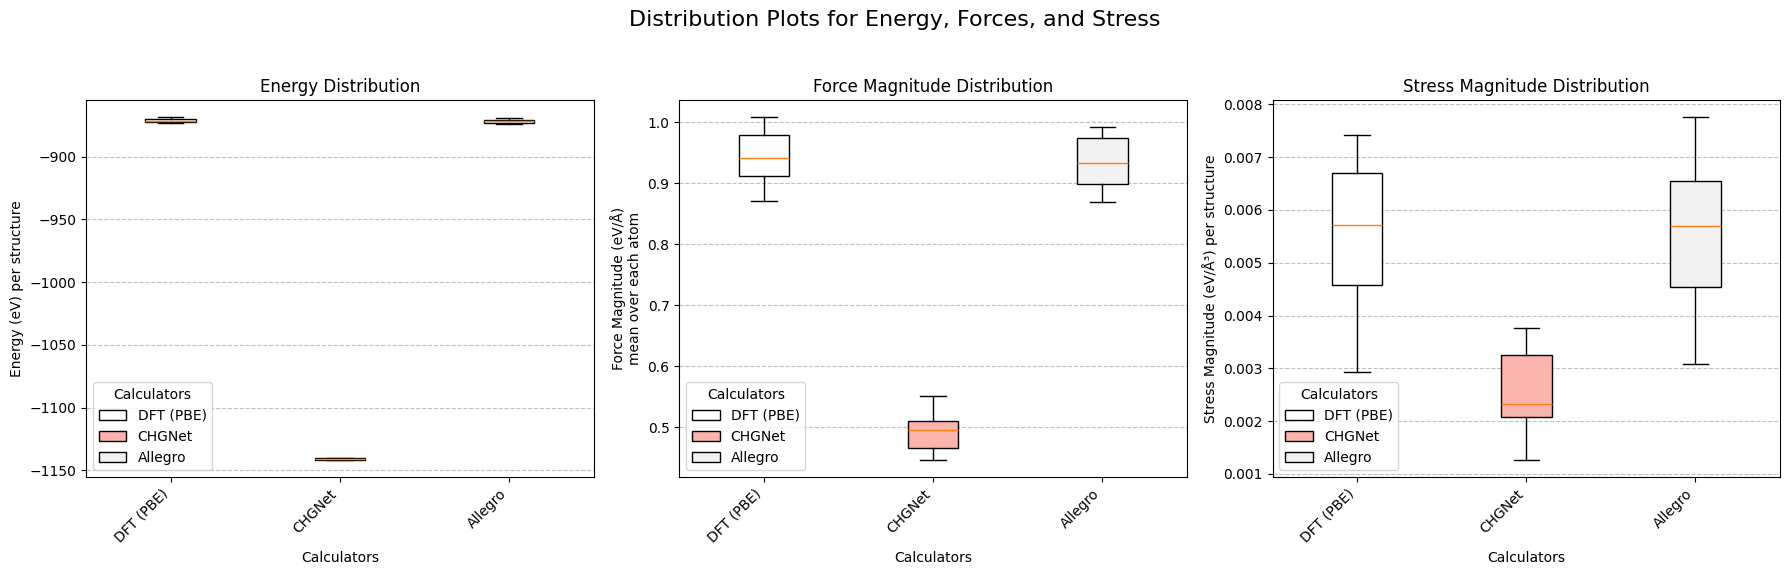

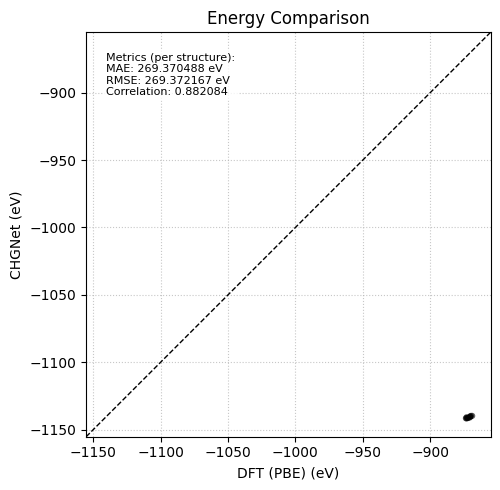

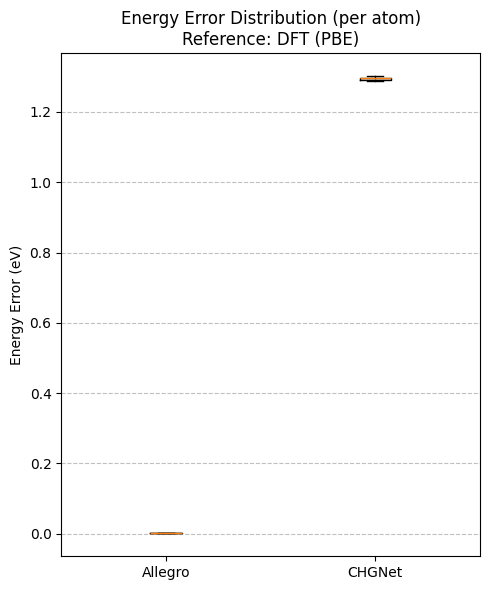

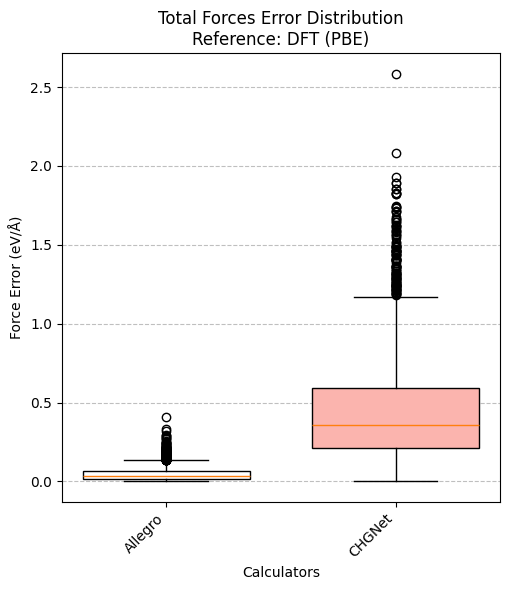

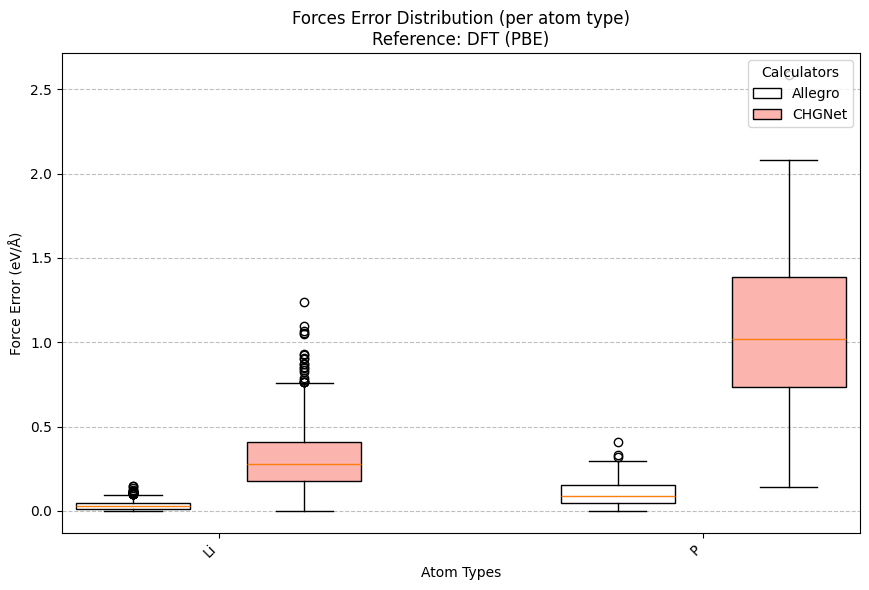

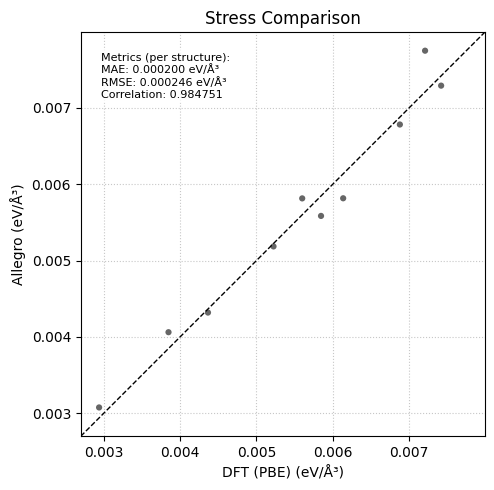

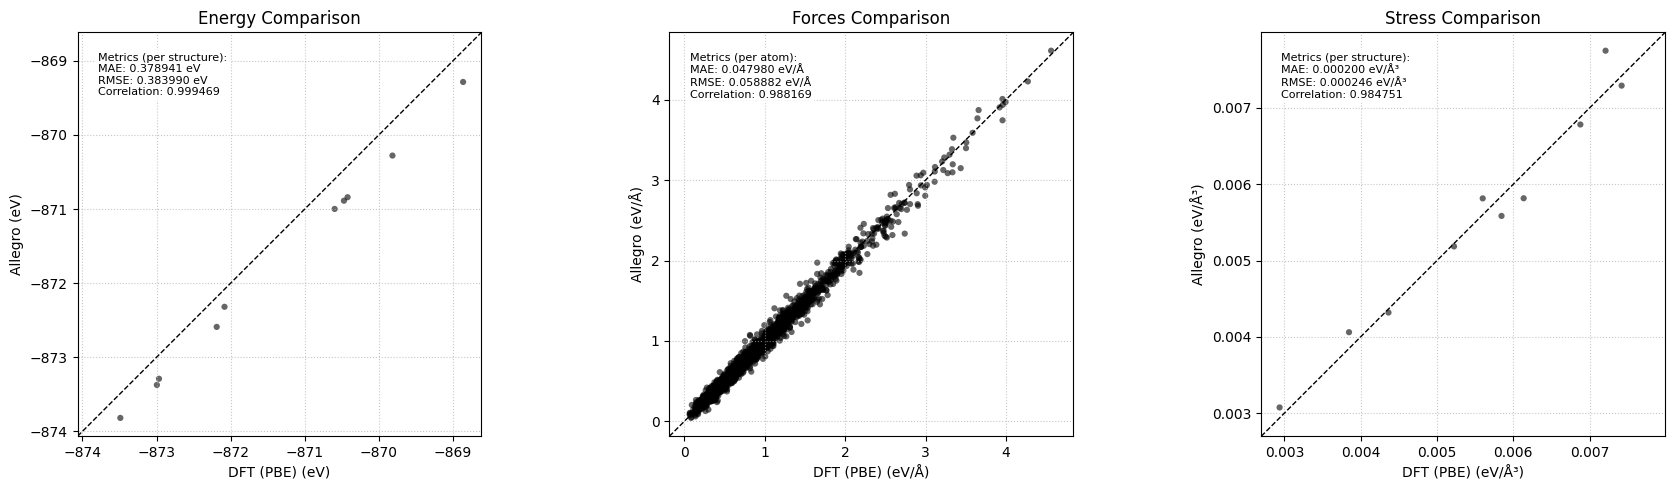

In [3]:
#Print Metrics
#EnergyPlotter.print_metrics(frames, vasp_calc,  [nequip_calc, second_nequip_calc])

# Generate plots
BasePlotter.plot_all_distributions(frames, [vasp_calc, chgnet_calc, nequip_calc])
EnergyPlotter.plot_scatter(frames, vasp_calc, chgnet_calc)
EnergyPlotter.plot_box(frames, vasp_calc, [nequip_calc, chgnet_calc], per_atom=True)
ForcesPlotter.plot_box(frames, vasp_calc, [nequip_calc, chgnet_calc], per_atom=False, group_spacing=0.1, box_spacing=0.2)
ForcesPlotter.plot_box(frames, vasp_calc, [nequip_calc, chgnet_calc], per_atom=True, group_spacing=1, box_spacing=0.2 , atom_types=['Li', 'P'])
StressPlotter.plot_scatter(frames, vasp_calc, nequip_calc)
BasePlotter.plot_all_scatter(frames, vasp_calc, nequip_calc)

In [ ]:
EnergyPlotter.print_metrics(frames, vasp_calc,nequip_calc)
ForcesPlotter.print_metrics(frames, vasp_calc,nequip_calc)
StressPlotter.print_metrics(frames, vasp_calc,nequip_calc)

In [ ]:

print('------Energy------')
print(frames.get_property_magnitude(Property.ENERGY, vasp_calc, 1).shape)
print(frames.get_property_magnitude(Property.ENERGY, vasp_calc, slice(0, 5)).shape)

print('------Stress------')
print(frames.get_property_magnitude(Property.STRESS, vasp_calc, 1).shape)
print(frames.get_property_magnitude(Property.STRESS, vasp_calc, slice(0, 5)).shape)

print('------Forces------')
print(frames.get_property_magnitude(Property.FORCES, vasp_calc, 1).shape)
print(frames.get_property_magnitude(Property.FORCES, vasp_calc, slice(0, 5)).shape)


print('------Energy------')
print(frames.get_mae(Property.ENERGY, vasp_calc, nequip_calc, 1))
print(frames.get_rmse(Property.ENERGY, vasp_calc, nequip_calc, slice(0, 5)))
print(frames.get_mae(Property.ENERGY, vasp_calc, [nequip_calc,nequip_calc], 1))
print(frames.get_rmse(Property.ENERGY, vasp_calc,  [nequip_calc,nequip_calc], slice(0, 5)))
print(frames.get_correlation(Property.ENERGY, vasp_calc, nequip_calc, 1))
print(frames.get_correlation(Property.ENERGY, vasp_calc, nequip_calc, slice(0, 5)))

print('------Stress------')
print(frames.get_mae(Property.STRESS, vasp_calc, nequip_calc, 1))
print(frames.get_rmse(Property.STRESS, vasp_calc, nequip_calc, slice(0, 5)))
print(frames.get_mae(Property.STRESS, vasp_calc, [nequip_calc,nequip_calc], 1))
print(frames.get_rmse(Property.STRESS, vasp_calc,  [nequip_calc,nequip_calc], slice(0, 5)))
print(frames.get_correlation(Property.STRESS, vasp_calc, nequip_calc, 1))
print(frames.get_correlation(Property.STRESS, vasp_calc, nequip_calc, slice(0, 5)))

print('------Forces------')
print(frames.get_mae(Property.FORCES, vasp_calc, nequip_calc, 1))
print(frames.get_rmse(Property.FORCES, vasp_calc, nequip_calc, slice(0, 5)))
print(frames.get_mae(Property.FORCES, vasp_calc, [nequip_calc,nequip_calc], 1))
print(frames.get_rmse(Property.FORCES, vasp_calc,  [nequip_calc,nequip_calc], slice(0, 5)))
print(frames.get_correlation(Property.FORCES, vasp_calc, nequip_calc, 1))
print(frames.get_correlation(Property.FORCES, vasp_calc, nequip_calc, slice(0, 5)))

